# INTRODUÇÃO AO PANDAS

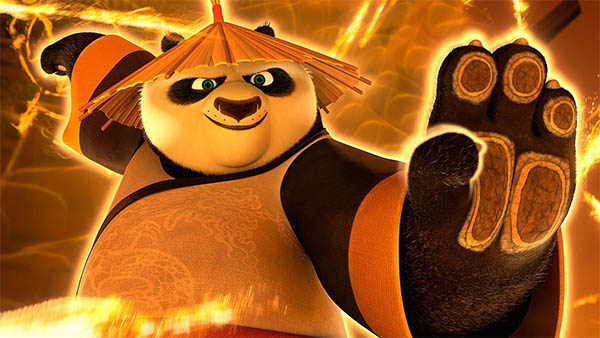

In [20]:
from IPython.display import Image
Image('kpf-po.jpg')

## DataFrame
A DataFrame represents a rectangular table of data and contains an ordered collec‐
tion of columns, each of which can be a different value type (numeric, string,
boolean, etc.). The DataFrame has both a row and column index; it can be thought of
as a dict of Series all sharing the same index. Under the hood, the data is stored as one
or more two-dimensional blocks rather than a list, dict, or some other collection of
one-dimensional arrays. The exact details of DataFrame’s internals are outside the
scope of this book.


Existem muitas maneiras de construir um DataFrame, embora uma das mais comuns seja
de um ditado de listas de mesmo tamanho ou matrizes NumPy:

In [8]:
import pandas as pd

In [9]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [10]:
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Se você estiver usando o bloco de anotações Jupyter, os objetos pandas DataFrame serão exibidos como
uma tabela HTML mais amigável ao navegador.

Para DataFrames grandes, o método head seleciona apenas as cinco primeiras linhas:

In [11]:
frame.head()  # com o comando head podemos imprimir somente os 5 primeiras linhas

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Se você especificar uma sequência de colunas, as colunas do DataFrame serão organizadas em
essa ordem:

In [13]:
pd.DataFrame(data,columns = ['year','state','pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


Se você passar uma coluna que não está contida no ditado, ela aparecerá com valores ausentes
no resultado

In [15]:
frame2 = pd.DataFrame(data,columns = ['year','state','pop','debt'],index = ['one','two','three','four','five','six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [16]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Uma coluna em um DataFrame pode ser recuperada como uma Série por notação do tipo ditado ou
por atributo:

In [23]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [24]:
frame.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

Observe que as séries retornadas têm o mesmo índice que o DataFrame e seu nome
O atributo foi definido adequadamente.

As linhas também podem ser recuperadas por posição ou nome com o atributo loc especial (muito
mais sobre isso mais tarde):

In [27]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

As colunas podem ser modificadas por atribuição. Por exemplo, a coluna 'dívida' vazia
pode ser atribuído um valor escalar ou uma matriz de valores:

In [28]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [30]:
import numpy as np

In [36]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


Ao atribuir listas ou matrizes a uma coluna, o comprimento do valor deve corresponder ao
comprimento do DataFrame. Se você atribuir uma série, seus rótulos serão realinhados exatamente para
o índice do DataFrame, inserindo valores ausentes em todos os furos:

In [39]:
val = pd.Series([-1.2, -1.5, -1.7],index = ['two','four','five'])

In [40]:
frame2['debt'] = val
frame2['debt']

one      NaN
two     -1.2
three    NaN
four    -1.5
five    -1.7
six      NaN
Name: debt, dtype: float64

In [41]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Atribuir uma coluna que não existe criará uma nova coluna. A palavra-chave del será
excluir colunas como em um ditado.

Como exemplo de del, primeiro adiciono uma nova coluna de valores booleanos em que o estado
coluna é igual a 'Ohio':

In [42]:
frame2['eastern'] = frame2['state'] == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


Vamos ulizar metodo del para deletar a coluna eastern

In [43]:
del frame2['eastern']

In [45]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [47]:
pop = {'Nevada':{2001:2.4,2002:2.9},'Ohio':{2000:1.5,2001:1.7,2002:3.7}}

In [48]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.7


Você pode transpor o DataFrame (trocar linhas e colunas) com sintaxe semelhante a um
Matriz NumPy:

In [49]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.7


As chaves nos dicionários internos são combinadas e classificadas para formar o índice no resultado.
Isso não é verdade se um índice explícito for especificado:

In [60]:
pdata = {'Ohio': frame3['Ohio'][:-1],
  'Nevada': frame3['Nevada'][:2]}

In [61]:
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


Para obter uma lista completa das coisas que você pode transmitir ao construtor DataFrame, consulte a Tabela 5-1.
Se o índice e as colunas de um DataFrame tiverem seus atributos de nome definidos, eles também serão
exibido:

In [62]:
frame3.index.name = 'year';frame3.columns.name = 'state'

In [63]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.7


Como na série, o atributo values ​​retorna os dados contidos no DataFrame como um
ndarray bidimensional:

In [64]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.7]])

Se as colunas do DataFrame tiverem tipos diferentes, o tipo da matriz de valores será
escolhido para acomodar todas as colunas:

In [65]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)